In [1]:
import importlib
import tree
import random_forest

importlib.reload(tree)
importlib.reload(random_forest)

<module 'random_forest' from '/home/paulina/air/uma-random-forest/src/random_forest.py'>

In [1]:
from datasets.breast_cancer import BreastCancerDataset
from random_forest import RandomForestClassifier, TournamentRandomForestClassifier
import math, time

In [3]:
from utils import experiments
importlib.reload(experiments)
from utils.experiments import grid_search  

# Load dataset

In [2]:
path = "../data/breast-cancer/breast-cancer.csv"
dataset_name = 'breast_koniec'
n_calls = 3

dataset = BreastCancerDataset()
dataset.clean()
X_train, X_val, y_train, y_val = dataset.split(test_size=0.2, random_state=42)

n_features = round(math.sqrt(X_train.shape[1]))

# Random forest classifier

In [5]:
params_matrix = {
    # "n_trees": [10, 50, 100, 200, 500],
    # "n_trees": [10, 20, 30],
    # "n_trees": [100, 300, 500],
    "n_trees": [10, 20, 30, 100, 300, 500],
    "max_depth": [
        3, 4, 5, 6, 15
    ],
    "max_split_values" : [1000],
    "max_features": [n_features],
}

In [6]:
path = f"../out/{dataset_name}/random_forest_classifier.csv"

time_start = time.time()
best_params, score, all_results  = grid_search(
    params_matrix, RandomForestClassifier, X_train, X_val, y_train, y_val, n_calls, path = path
)

print(f"Execution time: {time.time() - time_start}")
print(f"Best params: {best_params}")
print(f"Best score: {score}")
print(f"All results: {all_results}")


  0%|          | 0/30 [00:00<?, ?it/s]INFO:root:RandomForestClassifier: n_trees=10, max_depth=3
INFO:root:DecisionTreeClassifier(max_depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=26, split_val=0.38415, depth=2) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=14, split_val=0.0058635, depth=2) created
INFO:root:Node(split_feature=2, split_val=92.49, depth=1) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=2, split_val=88.77000000000001, depth=2) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_f

# Tournament random forest classifier

In [ ]:
params_matrix = {
    # "n_trees": [10, 50, 100, 200, 500],
    # "n_trees": [10, 20, 30],
    # "n_trees": [100, 300, 500],
    "n_trees": [10, 20, 30, 100, 300, 500],
    # "n_trees": [500],
    "max_depth": [
        3, 4, 5, 6, 15
    ],
    "tournament_size": [2, 5, 7, 20],
    "max_features": [n_features],
}

In [ ]:
path = f"../out/{dataset_name}/tournament_forest_classifier.csv"

time_start = time.time()
best_params, score, all_results  = grid_search(
    params_matrix, TournamentRandomForestClassifier, X_train, X_val, y_train, y_val, n_calls, path = path
)

print(f"Execution time: {time.time() - time_start}")
print(f"Best params: {best_params}")
print(f"Best score: {score}")
print(f"All results: {all_results}")


In [20]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)
import matplotlib.pyplot as plt
import numpy as np

In [4]:
model = RandomForestClassifier(n_trees=20, max_depth=15, max_features=n_features, max_split_values=1000)
model.fit(X_train, y_train)
y_pred = np.array([model.predict(x) for x in X_val])


INFO:root:RandomForestClassifier: n_trees=20, max_depth=15
INFO:root:DecisionTreeClassifier(max_depth=15) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=4) created
INFO:root:Node(split_feature=None, split_val=None, depth=5) created
INFO:root:Node(split_feature=None, split_val=None, depth=5) created
INFO:root:Node(split_feature=21, split_val=23.89, depth=4) created
INFO:root:Node(split_feature=7, split_val=0.032189999999999996, depth=3) created
INFO:root:Node(split_feature=11, split_val=2.092, depth=2) created
INFO:root:Node(split_feature=None, split_val=None, depth=4) created
INFO:root:Node(split_feature=None, split_val=None, depth=5) created
INFO:root:Node(split_feature=None, split_val=None, depth=5) created
INFO:root:Node(split_feature=26, split_val=0.22955000000000003, depth=4) created
INFO:root:Node(split_feature=24, split_val=0.12405, depth=3) created
INFO:root:Node(split_feature=None, split_val=

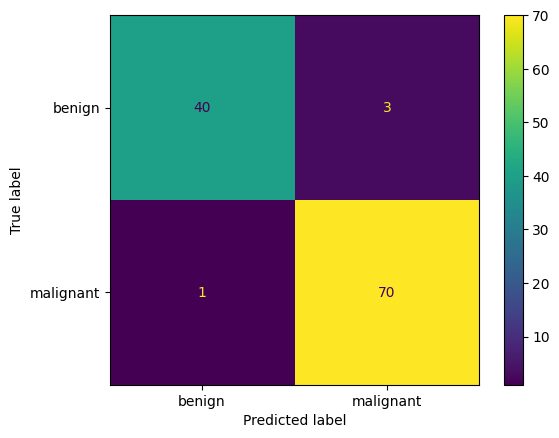

In [19]:
path = "../out/breast_cancer/random_forest_classifier_confusion_matrix_d15_nt20.png"
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["benign", "malignant"])
disp.plot()
plt.savefig(path)


In [10]:
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1: {f1}")  
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9649122807017544
F1: 0.9722222222222222
Precision: 0.958904109589041
Recall: 0.9859154929577465


In [21]:
model = TournamentRandomForestClassifier(n_trees=30, max_depth=50, tournament_size=7,  max_features=n_features)
model.fit(X_train, y_train)
y_pred = np.array([model.predict(x) for x in X_val])


INFO:root:RandomForestClassifier: n_trees=30, max_depth=50
INFO:root:TournamentRandomForestClassifier: n_trees=30, max_depth=50, tournament_size=7
INFO:root:TournamentDecisionTreeClassifier(max_depth=50) created
INFO:root:Node(split_feature=None, split_val=None, depth=1) created
INFO:root:Node(split_feature=None, split_val=None, depth=2) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=4) created
INFO:root:Node(split_feature=None, split_val=None, depth=5) created
INFO:root:Node(split_feature=None, split_val=None, depth=6) created
INFO:root:Node(split_feature=None, split_val=None, depth=7) created
INFO:root:Node(split_feature=None, split_val=None, depth=8) created
INFO:root:Node(split_feature=None, split_val=None, depth=9) created
INFO:root:Node(split_feature=None, split_val=None, depth=10) created
INFO:root:Node(split_feature=None, split_val=None, depth=11) created
INFO:root:Node(split_feature=None, spl

In [ ]:
path = "../out/breast_cancer/random_forest_classifier_confusion_matrix_d50_nt30.png"
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["benign", "malignant"])
disp.plot()
plt.savefig(path)